In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('regression_data.csv')
print(len(dataset))

19


In [3]:
dataset.columns

Index(['feature1', 'feature2', 'value'], dtype='object')

In [4]:
features = ['feature1', 'feature2']

In [5]:
dataset

,feature1,feature2,value
0,2.0,0.1,7.00
1,2.5,0.2,7.20
2,3.0,0.3,7.20
3,3.5,0.4,7.30
4,4.0,0.5,7.50
5,4.5,0.6,7.60
6,5.0,0.7,7.65
7,5.5,0.8,7.55
8,6.0,0.9,7.60
9,6.5,1.0,7.70


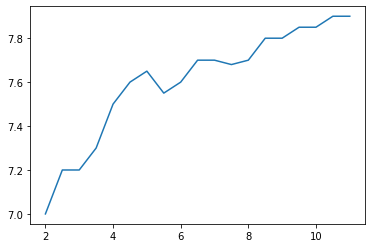

In [6]:
import matplotlib.pyplot as plt
plt.plot(dataset['feature1'], dataset['value'])

In [7]:
# initial guess

np.random.seed(0)

theta0 = 0
theta1 = 0
#theta2 = 0

In [8]:
def evaluate(theta0, theta1):
    error = 0
    for i in range(len(dataset)):
        output = dataset.loc[i]['value']
        #predicted = theta0 + theta1*dataset.loc[i]['feature1'] + theta2*dataset.loc[i]['feature2']
        predicted = theta0 + theta1*dataset.loc[i]['feature1']
        error += (output - predicted)**2

    error /= 2*len(dataset)
    return error

In [9]:
alpha = 0.03
num_iterations = 1000
n = len(dataset)
val0 = theta0
val1 = theta1
for i in range(num_iterations):
    for j in range(n):
        output = dataset.loc[j]['value']
        #predicted = theta0 + theta1*dataset.loc[j]['feature1'] + theta2*dataset.loc[j]['feature2']
        predicted = theta0 + theta1*dataset.loc[j]['feature1']
        print(output, predicted)
        val0 = val0 - alpha*(predicted-output)
        val1 = val1 - alpha*(predicted-output)*dataset.loc[j]['feature1']
        #theta2 -= alpha*(output - predicted)*dataset.loc[j]['feature2']
    theta0 = val0/n
    theta1 = val1/n
    #theta2 /= n

7.0 0.0
7.2 0.0
7.2 0.0
7.3 0.0
7.5 0.0
7.6 0.0
7.65 0.0
7.55 0.0
7.6 0.0
7.7 0.0
7.7 0.0
7.68 0.0
7.7 0.0
7.8 0.0
7.8 0.0
7.85 0.0
7.85 0.0
7.9 0.0
7.9 0.0
7.0 3.2322315789473683
7.2 3.983257894736842
7.2 4.734284210526315
7.3 5.485310526315788
7.5 6.2363368421052625
7.6 6.987363157894737
7.65 7.73838947368421
7.55 8.489415789473684
7.6 9.240442105263158
7.7 9.991468421052632
7.7 10.742494736842104
7.68 11.493521052631579
7.7 12.244547368421053
7.8 12.995573684210527
7.8 13.7466
7.85 14.497626315789473
7.85 15.248652631578947
7.9 15.999678947368421
7.9 16.750705263157894
7.0 1.5921227368421043
7.2 1.9510262763157882
7.2 2.3099298157894723
7.3 2.668833355263156
7.5 3.02773689473684
7.6 3.3866404342105243
7.65 3.745543973684208
7.55 4.104447513157892
7.6 4.463351052631576
7.7 4.82225459210526
7.7 5.181158131578943
7.68 5.540061671052627
7.7 5.8989652105263115
7.8 6.257868749999996
7.8 6.61677228947368
7.85 6.975675828947363
7.85 7.334579368421047
7.9 7.693482907894731
7.9 8.052386447368

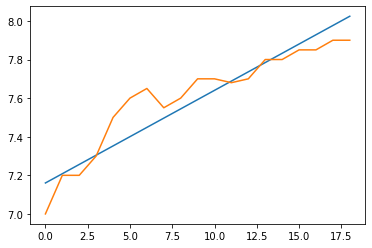

In [10]:
predicted_values = [theta0 + theta1*dataset.loc[j]['feature1'] for j in range(len(dataset))]
plt.plot(predicted_values)
plt.plot(dataset['value'])